<a href="https://colab.research.google.com/github/simran-sai/Healthcare-Proffesional-Classifier/blob/main/Final_HCP__classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv('Doceree-HCP_Train.csv',encoding='iso-8859-1')
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [26]:
!pip install klib

In [27]:
df.shape


(7150, 14)

  This shows number of unique values present in each column

GridSpec(6, 10)

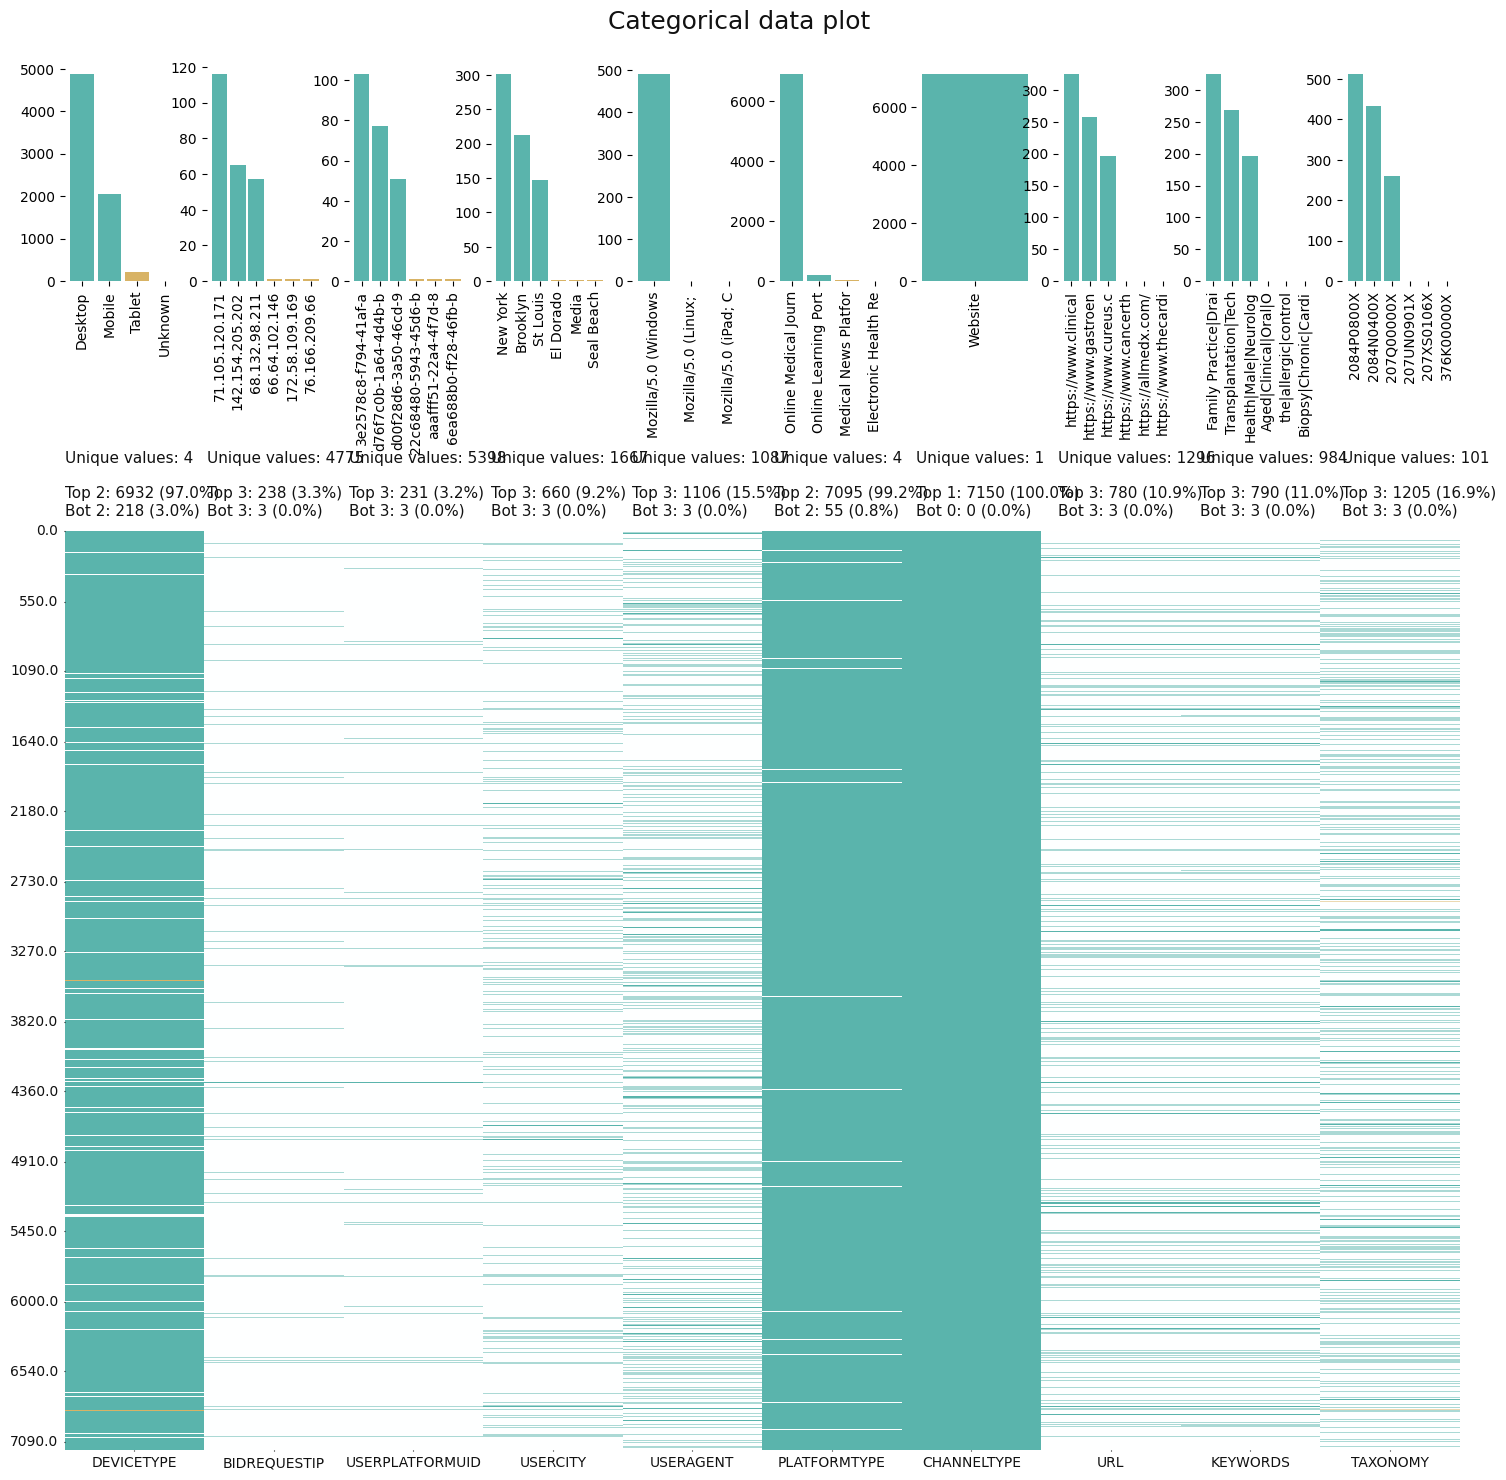

In [28]:
import klib
klib.cat_plot(df)

In [29]:
df = klib.data_cleaning(df)

Shape of cleaned data: (7150, 13) - Remaining NAs: 5779


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['channeltype']
Dropped missing values: 0
Reduced memory by at least: 0.3 MB (-39.47%)



In [30]:
df=klib.clean.convert_datatypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               7150 non-null   int16   
 1   devicetype       7150 non-null   category
 2   platform_id      7150 non-null   int8    
 3   bidrequestip     7150 non-null   string  
 4   userplatformuid  7150 non-null   string  
 5   usercity         6751 non-null   string  
 6   userzipcode      6862 non-null   float64 
 7   useragent        7150 non-null   string  
 8   platformtype     7150 non-null   category
 9   url              7150 non-null   string  
 10  keywords         7149 non-null   string  
 11  taxonomy         2060 non-null   category
 12  is_hcp           7149 non-null   float32 
dtypes: category(3), float32(1), float64(1), int16(1), int8(1), string(6)
memory usage: 466.2 KB


In [31]:
df.isnull().mean()*100

id                  0.000000
devicetype          0.000000
platform_id         0.000000
bidrequestip        0.000000
userplatformuid     0.000000
usercity            5.580420
userzipcode         4.027972
useragent           0.000000
platformtype        0.000000
url                 0.000000
keywords            0.013986
taxonomy           71.188811
is_hcp              0.013986
dtype: float64

Handling the missing values
Since the missing values of usercity and userzipcode is around 5% we randomly fill the missing values with existing non missing values

In [32]:

df.columns

Index(['id', 'devicetype', 'platform_id', 'bidrequestip', 'userplatformuid',
       'usercity', 'userzipcode', 'useragent', 'platformtype', 'url',
       'keywords', 'taxonomy', 'is_hcp'],
      dtype='object')

In [33]:
print(df)

        id devicetype  platform_id    bidrequestip  \
0     1001    Desktop            2    170.173.0.22   
1     1002    Desktop            2   65.216.253.25   
2     1003    Desktop            2    66.232.79.22   
3     1004    Desktop            3  137.54.125.246   
4     1005     Mobile            7  174.202.231.99   
...    ...        ...          ...             ...   
7145  8146    Desktop            2   71.244.114.10   
7146  8147    Desktop            2   73.198.39.143   
7147  8148     Mobile            6  71.184.121.225   
7148  8149    Desktop            2    73.242.24.82   
7149  8150    Desktop            2   76.166.209.66   

                           userplatformuid           usercity  userzipcode  \
0     6974dcaa-f932-480e-9fb5-c52e20e1393a           Portland      97206.0   
1     c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf          Arlington      22202.0   
2     a698de4b-e200-46dd-b5fb-40402175ae18        New Meadows      83654.0   
3     45967533-75c8-4fbd-a00c-e6ff20447

In [34]:
import random

def fill_missing_with_random(df, column):
    existing_values = df[column].dropna().unique()
    missing_indices = df[df[column].isnull()].index

    df.loc[missing_indices, column] = random.choice(existing_values)

# Fill missing values in 'userzipcode' column
fill_missing_with_random(df, 'userzipcode')

# Fill missing values in 'usercity' column
fill_missing_with_random(df, 'usercity')


In [35]:
df.isnull().mean()*100

id                  0.000000
devicetype          0.000000
platform_id         0.000000
bidrequestip        0.000000
userplatformuid     0.000000
usercity            0.000000
userzipcode         0.000000
useragent           0.000000
platformtype        0.000000
url                 0.000000
keywords            0.013986
taxonomy           71.188811
is_hcp              0.013986
dtype: float64

In [36]:
df.head()

,id,devicetype,platform_id,bidrequestip,userplatformuid,usercity,userzipcode,useragent,platformtype,url,keywords,taxonomy,is_hcp
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,Berkley,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


To handle missing values of 'taxonomy' we create a new category for all misswing values

In [37]:


def fill_missing_with_category(df, column, category):
    # Convert the column to string type
    df[column] = df[column].astype(str)

    # Fill missing values with 'missing' category
    df[column].fillna(category, inplace=True)

    # Convert the column back to categorical type if desired
    #df[column] = df[column].astype('category')

# Fill missing values in 'taxonomy' column with 'missing' category
fill_missing_with_category(df, 'taxonomy', 'Missing')


In [38]:

df.drop([ 'url'], axis=1, inplace=True)


# Print the updated original DataFrame
print(df)


        id devicetype  platform_id    bidrequestip  \
0     1001    Desktop            2    170.173.0.22   
1     1002    Desktop            2   65.216.253.25   
2     1003    Desktop            2    66.232.79.22   
3     1004    Desktop            3  137.54.125.246   
4     1005     Mobile            7  174.202.231.99   
...    ...        ...          ...             ...   
7145  8146    Desktop            2   71.244.114.10   
7146  8147    Desktop            2   73.198.39.143   
7147  8148     Mobile            6  71.184.121.225   
7148  8149    Desktop            2    73.242.24.82   
7149  8150    Desktop            2   76.166.209.66   

                           userplatformuid           usercity  userzipcode  \
0     6974dcaa-f932-480e-9fb5-c52e20e1393a           Portland      97206.0   
1     c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf          Arlington      22202.0   
2     a698de4b-e200-46dd-b5fb-40402175ae18        New Meadows      83654.0   
3     45967533-75c8-4fbd-a00c-e6ff20447

We perform label encoding to the all the categorical values present

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               7150 non-null   int16   
 1   devicetype       7150 non-null   category
 2   platform_id      7150 non-null   int8    
 3   bidrequestip     7150 non-null   string  
 4   userplatformuid  7150 non-null   string  
 5   usercity         7150 non-null   string  
 6   userzipcode      7150 non-null   float64 
 7   useragent        7150 non-null   string  
 8   platformtype     7150 non-null   category
 9   keywords         7149 non-null   string  
 10  taxonomy         7150 non-null   object  
 11  is_hcp           7149 non-null   float32 
dtypes: category(2), float32(1), float64(1), int16(1), int8(1), object(1), string(5)
memory usage: 454.4+ KB


In [40]:

df = df.dropna(subset=['useragent', 'userplatformuid', 'is_hcp'])


In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' containing your dataset

# Get the categorical column names
categorical_columns = df.select_dtypes(include=['category','object']).columns.tolist()

# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print the updated DataFrame with label encoded categorical columns
df.head()


<ipython-input-41-9c33b43cee45>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-41-9c33b43cee45>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
<ipython-input-41-9c33b43cee45>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,id,devicetype,platform_id,bidrequestip,userplatformuid,usercity,userzipcode,useragent,platformtype,keywords,taxonomy,is_hcp
0,1001,0,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3,General|Endocrine|False|Medicine|Surgery|Urolo...,101,0.0
1,1002,0,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,3,Bone Marrow|Radiography|Chronic|Oncology|Psych...,101,0.0
2,1003,0,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,3,General|Endocrine|False|Medicine|Surgery|Urolo...,101,0.0
3,1004,0,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,Berkley,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3,Dental|Total|Clinical|Pharmacology|Physicians|...,71,1.0
4,1005,1,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,3,Critical Care|Emergency Medicine|General Pract...,101,0.0


In [42]:
string_columns = df.select_dtypes(include=['string']).columns.tolist()

# Drop rows with missing values in the string columns
df = df.dropna(subset=string_columns)


In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame named 'df' containing your dataset

# Get the categorical column names
categorical_columns = df.select_dtypes(include=['string']).columns.tolist()

# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print the updated DataFrame with label encoded categorical columns
df.head()


,id,devicetype,platform_id,bidrequestip,userplatformuid,usercity,userzipcode,useragent,platformtype,keywords,taxonomy,is_hcp
0,1001,0,2,1006,2273,1218,97206.0,653,3,245,101,0.0
1,1002,0,2,2793,4073,48,22202.0,544,3,65,101,0.0
2,1003,0,2,2844,3526,1032,83654.0,544,3,245,101,0.0
3,1004,0,3,578,1512,114,229114624.0,691,3,144,71,1.0
4,1005,1,7,1466,3423,672,77008.0,1009,3,133,101,0.0


In [44]:
import pandas as pd
import numpy as np

# Define a function to detect outliers using the z-score method
def detect_outliers_zscore(data):
    threshold = 3
    z_scores = np.abs((data - data.mean()) / data.std())
    return np.where(z_scores > threshold)

# Detect outliers in all columns of the DataFrame
outliers = {}
for column in df.columns:
    outliers[column] = detect_outliers_zscore(df[column])

# Print the outliers detected in each column
for column, outlier_indices in outliers.items():
    print(f"Outliers in column '{column}': {outlier_indices}")


Outliers in column 'id': (array([], dtype=int64),)
Outliers in column 'devicetype': (array([  31,   34,   54,   75,   91,   97,  105,  113,  114,  128,  164,
        208,  213,  256,  284,  287,  291,  337,  353,  385,  387,  425,
        448,  509,  575,  619,  652,  785,  840,  851,  852,  860,  954,
        970, 1107, 1110, 1146, 1204, 1211, 1255, 1273, 1275, 1317, 1328,
       1333, 1416, 1463, 1490, 1528, 1575, 1585, 1630, 1644, 1649, 1657,
       1706, 1710, 1749, 1814, 1816, 1835, 1851, 1880, 1889, 1954, 2020,
       2121, 2140, 2224, 2248, 2291, 2329, 2428, 2453, 2497, 2553, 2559,
       2596, 2606, 2719, 2720, 2762, 2791, 2843, 2877, 2881, 2883, 2886,
       2887, 2947, 2950, 3014, 3063, 3087, 3104, 3219, 3220, 3222, 3227,
       3279, 3327, 3328, 3345, 3408, 3423, 3460, 3496, 3497, 3507, 3559,
       3598, 3624, 3657, 3732, 3800, 3874, 3918, 3975, 4025, 4033, 4086,
       4112, 4129, 4130, 4160, 4164, 4173, 4239, 4242, 4259, 4283, 4304,
       4321, 4357, 4413, 4434, 4467, 44

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7149 entries, 0 to 7148
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7149 non-null   int16  
 1   devicetype       7149 non-null   int64  
 2   platform_id      7149 non-null   int8   
 3   bidrequestip     7149 non-null   int64  
 4   userplatformuid  7149 non-null   int64  
 5   usercity         7149 non-null   int64  
 6   userzipcode      7149 non-null   float64
 7   useragent        7149 non-null   int64  
 8   platformtype     7149 non-null   int64  
 9   keywords         7149 non-null   int64  
 10  taxonomy         7149 non-null   int64  
 11  is_hcp           7149 non-null   float32
dtypes: float32(1), float64(1), int16(1), int64(8), int8(1)
memory usage: 607.4 KB


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame named 'df' containing your data

# Separate the features (X) and the target variable (y)
X = df.drop('is_hcp', axis=1)
y = df['is_hcp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f"Accuracy: {accuracy_percentage}%")


Accuracy: 99.37062937062937%
